In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PARENT_DIR = "/projects/leelab/clin25"
DATASET_LIST = [
    "caltech-101",
    "oxford_flowers",
    "food-101",
]
DATASET_FORMATTED_NAME_DICT = {
    "caltech-101": "Caltech101",
    "oxford_flowers": "Flowers102",
    "food-101": "Food101",
}
SEED = 1
PROMPT_LEN_LIST = [4, 8, 16, 32, 64]

In [3]:
def retrieve_accuracy(
    dataset: str, prompt_len: int, evaluation: str, seed: int = SEED
) -> float:
    if evaluation == "seen":
        eval_dir = "eval-base"
    elif evaluation == "unseen":
        eval_dir = "eval-new"
    else:
        raise ValueError(f"evaluation={evaluation} should be seen or unseen!")
    
    if prompt_len == 4:
        output_dir = "cpl-output"
    else:
        output_dir = f"cpl-output-len{prompt_len}"
    
    output_dir = os.path.join(
        PARENT_DIR, output_dir, dataset, "base", f"{seed}", eval_dir
    )
    
    with open(os.path.join(output_dir, "log.txt")) as handle:
        log_text = handle.readlines()
        
    accuracy_line = log_text[-3].strip().replace("* ", "").replace(":", "")
    assert accuracy_line.split(" ")[0] == "accuracy"
    return float(accuracy_line.split(" ")[1].replace("%", ""))

In [4]:
seen_accuracy_list_dict = {
    dataset: [] for dataset in DATASET_LIST
}
unseen_accuracy_list_dict = {
    dataset: [] for dataset in DATASET_LIST
}

for dataset in DATASET_LIST:
    for prompt_len in PROMPT_LEN_LIST:
        seen_accuracy_list_dict[dataset].append(
            retrieve_accuracy(dataset, prompt_len, "seen")
        )
        unseen_accuracy_list_dict[dataset].append(
            retrieve_accuracy(dataset, prompt_len, "unseen")
        )

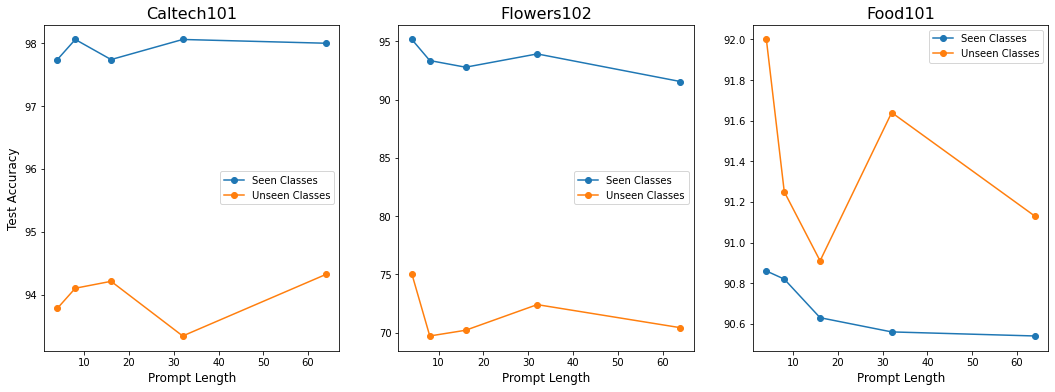

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for i, dataset in enumerate(DATASET_LIST):
    axes[i].plot(
        PROMPT_LEN_LIST,
        seen_accuracy_list_dict[dataset],
        label="Seen Classes",
        marker="o",
    )
    axes[i].plot(
        PROMPT_LEN_LIST,
        unseen_accuracy_list_dict[dataset],
        label="Unseen Classes",
        marker="o",
    )
    axes[i].set_xlabel("Prompt Length", fontsize=12)
    if i == 0:
        axes[i].set_ylabel("Test Accuracy", fontsize=12)
    axes[i].legend()
        
    axes[i].set_title(
        DATASET_FORMATTED_NAME_DICT[dataset],
        fontsize=16,
    )
plt.show()